# Validation Curve

Hyperparameter optimization is an important part of machine learning which deals with the problem of choosing an optimal hyperparameter set for a learning algorithm. Today there are many approaches that automate this procedure. However, there might be still situations in which we want to tune specific hyperparameters of our estimator by hand. This is where validation curves become a very useful tool to have in your pocket.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

We will illustrate the usefulness of validation curves on an synthetic classification problem. I choose to make this problem non-linear so that overfitting might become a problem when estimating a too complex model.

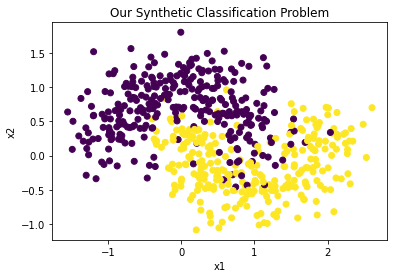

In [166]:
# Create sample dataset 
X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)

# Split into training, validation and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0)

# Plot training data
plt.title("Our Synthetic Classification Problem")
plt.scatter(x = X_train[:,0], y = X_train[:,1], c = y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

We will use a `DecisionTreeClassifier` for building the model since it is very good in capturing non-linear relationships, and therefore comes with low bias. At the same time, decision trees are sensible to overfitting if the model gets too complex, resulting in high variance of the predictions. To find the optimal trade off between bias and variance (in other words to find an appropriate level of complexity) we can tune some hyperparameters of the algorithm.

In this notebook we will focus on the `max_depth` parameter which controls how many levels our decision tree will grow at maximum. The more levels our model has, the higher its complexity. I illustrate this relationship by visualizing the decision function for various choices of `max_depth`.

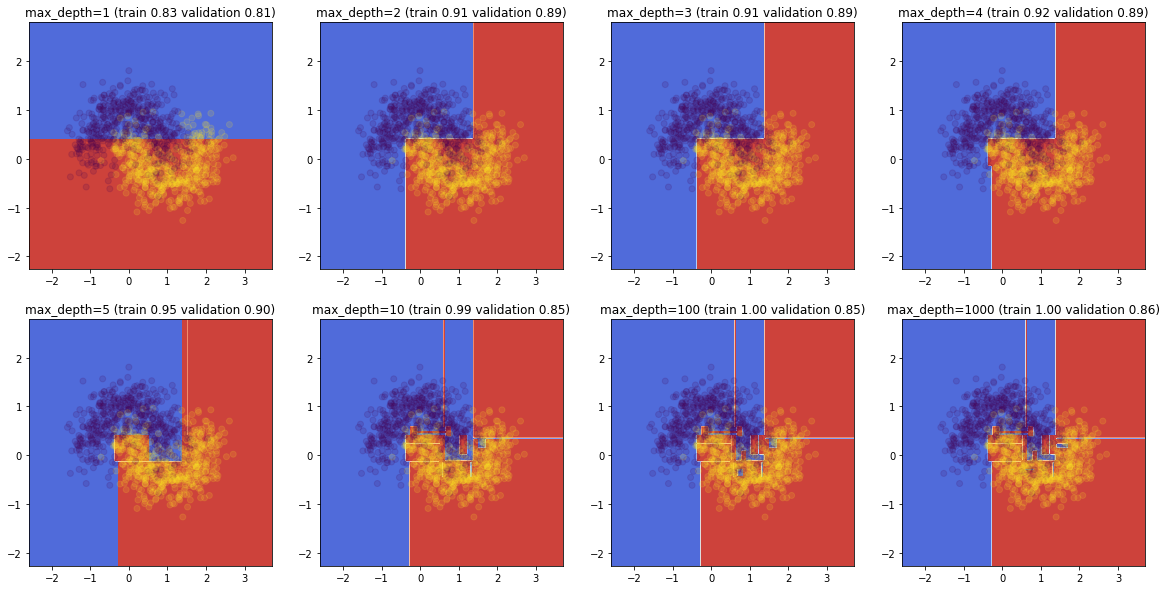

In [171]:
def plot_decision_function(clf, X, y, ax):
    """Plots decision function of a classifier on a given axis"""
    
    # Create a mesh for plotting
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Make predictions and put into color plot
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    ax.scatter(x = X[:,0], y = X[:,1], c = y, alpha=0.15)

    return ax

# Visualize decision function for different hyperparameter choices
fig = plt.figure(figsize=(20, 10))
max_depth_ls = [1, 2, 3, 4, 5, 10, 100, 1000]
for i, max_depth in enumerate(max_depth_ls):
    # Fit and score classifier
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    val_score = clf.score(X_val, y_val)
    ax = fig.add_subplot(2, 4, i+1)
    ax.set_title(f"max_depth={max_depth} (train {train_score:.2f} validation {val_score:.2f})")
    plot_decision_function(clf, X, y, ax)
plt.show()

With that, we want to find the optimal choice for the `max_depth` parameter. Here, optimal means high accuracy of our class prediction on the validation set. For this purpose we can train the classifier for a range of `max_depth` values and score its predictions on the train and the validation set. If we plot the results from this procedure, we get the validation curve. And from this validation curve we can read the optimal choice for the `max_depth` parameter.

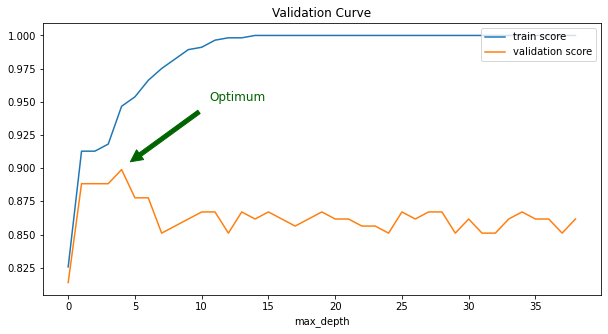

In [157]:
# Calculate accuracy on train and validation set for different hyperparemeter choices
max_depth_ls = np.arange(1, 40, 1)
train_score_ls, val_score_ls = [], []

for max_depth in max_depth_ls:
    
    # Fit model to training data
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    # Score model and store results
    train_score = clf.score(X_train, y_train)
    val_score = clf.score(X_val, y_val)
    train_score_ls.append(train_score)
    val_score_ls.append(val_score)

# Plot validation curve
plt.figure(figsize=(10, 5))
plt.title("Validation Curve")
plt.plot(train_score_ls, label='train score')
plt.plot(val_score_ls, label='validation score')
plt.annotate('Optimum',
            xy=(4, 0.9), xycoords='data',
            xytext=(0.4, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='darkgreen', shrink=0.1),
            color='darkgreen', fontsize=12,
            horizontalalignment='right', verticalalignment='top')
plt.xlabel('max_depth')
plt.legend(loc='upper right')
plt.show()